## Análisis de datos - Clase 5

### Técnicas de reducción de dimensionalidad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [31]:
# Dataset Iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [32]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [33]:
np.shape(iris.data)

(150, 4)

In [34]:
# Estandariza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Principal Component Analysis (PCA)

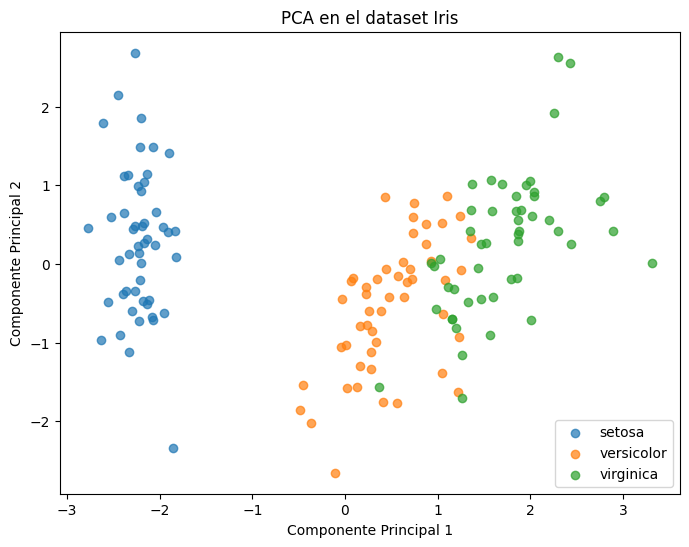

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.title("PCA en el dataset Iris")
plt.show()


In [36]:
print(pca.explained_variance_ratio_)  # % de varianza capturada por cada componente

[0.72962445 0.22850762]


In [37]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y
df_pca

,PCA1,PCA2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


### Linear Discriminant Analysis (LDA)

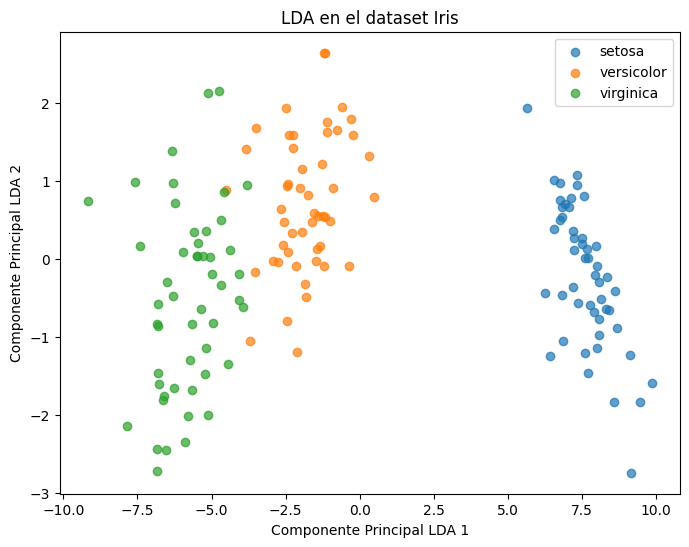

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal LDA 1")
plt.ylabel("Componente Principal LDA 2")
plt.legend()
plt.title("LDA en el dataset Iris")
plt.show()

In [39]:
print(f'Separabilidad: {lda.explained_variance_ratio_}')  # % de varianza capturada por cada componente

Separabilidad: [0.9912126 0.0087874]


In [40]:
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['target'] = y
df_lda

,LDA1,LDA2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

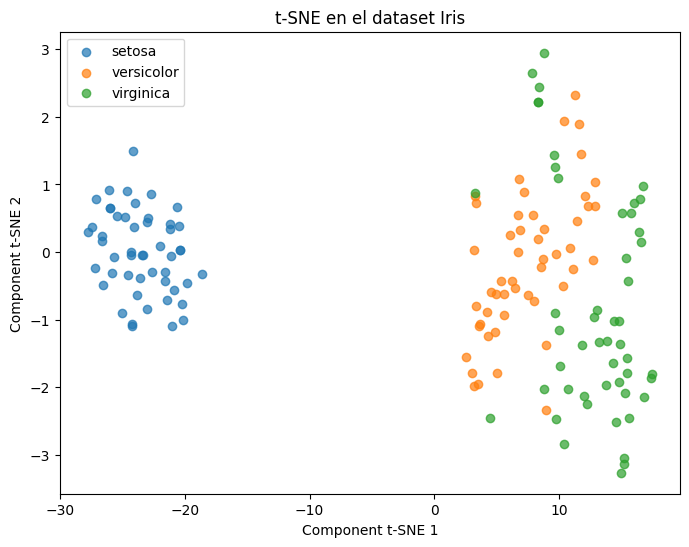

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Component t-SNE 1")
plt.ylabel("Component t-SNE 2")
plt.legend()
plt.title("t-SNE en el dataset Iris")
plt.show()

### Uniform Manifold Approximation and Projection (UMAP)

In [42]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

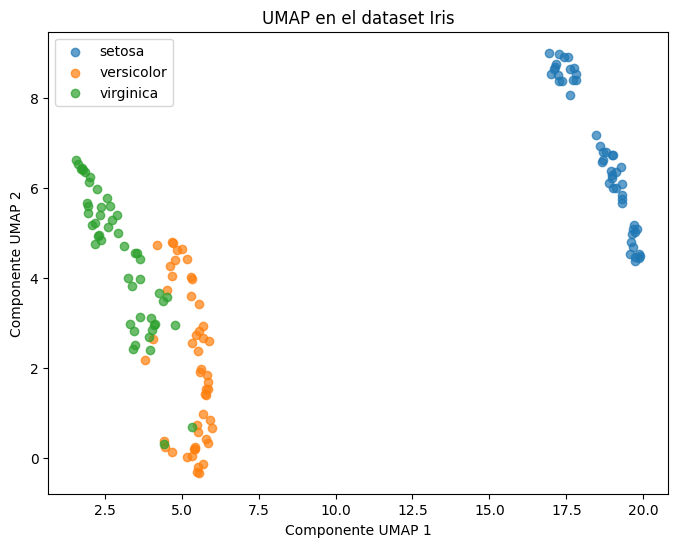

In [43]:
import umap
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_umap[y == i, 0], X_umap[y == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend()
plt.title("UMAP en el dataset Iris")
plt.show()


#### Silhouette Score:
- Cercano a 1: Las clases están bien separadas.
- Cerca de 0: Hay solapamiento entre clases.
- Negativo: Los puntos están mal asignados a grupos.

In [44]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_umap, y)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.53


In [45]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y
df_umap

,UMAP1,UMAP2,target
0,18.896622,6.105142,0
1,17.012955,8.529616,0
2,17.719067,8.402120,0
3,17.612303,8.650931,0
4,19.295191,5.665360,0
...,...,...,...
145,2.752554,5.294931,2
146,3.436660,2.426673,2
147,3.470743,4.562652,2
148,2.188414,4.745640,2
